## Implementing Simple Linear Regression

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

In [2]:
df=pd.read_csv('height-weight.csv')
df.head()

,Weight,Height
0,45,120
1,58,135
2,48,123
3,60,145
4,70,160


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23 entries, 0 to 22
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Weight  23 non-null     int64
 1   Height  23 non-null     int64
dtypes: int64(2)
memory usage: 500.0 bytes


In [4]:
df.describe()

,Weight,Height
count,23.000000,23.000000
mean,73.826087,158.391304
std,17.872407,19.511626
min,45.000000,120.000000
25%,59.000000,142.500000
50%,78.000000,162.000000
75%,86.000000,175.000000
max,105.000000,183.000000


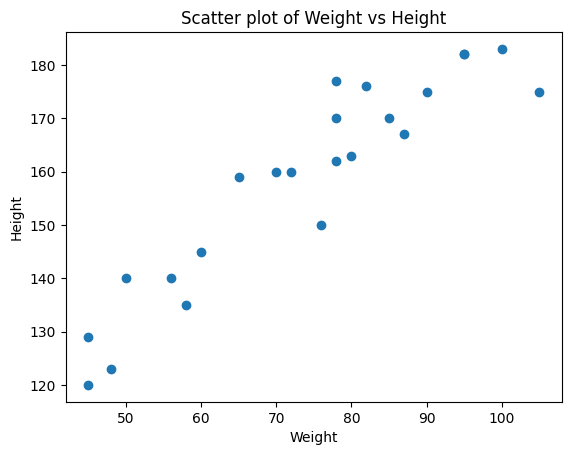

In [7]:
plt.scatter(df['Weight'],df['Height'])
plt.title('Scatter plot of Weight vs Height')
plt.xlabel('Weight')
plt.ylabel('Height')
plt.show()

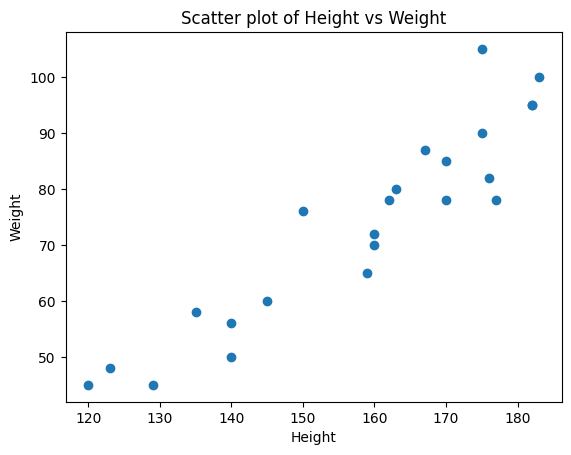

In [10]:
plt.scatter(df['Height'],df['Weight'])
plt.title('Scatter plot of Height vs Weight')
plt.xlabel('Height')
plt.ylabel('Weight')
plt.show()

In [8]:
## Finding Coorelation
df.corr() # Pearson's Correlation Coefficient


,Weight,Height
Weight,1.000000,0.931142
Height,0.931142,1.000000


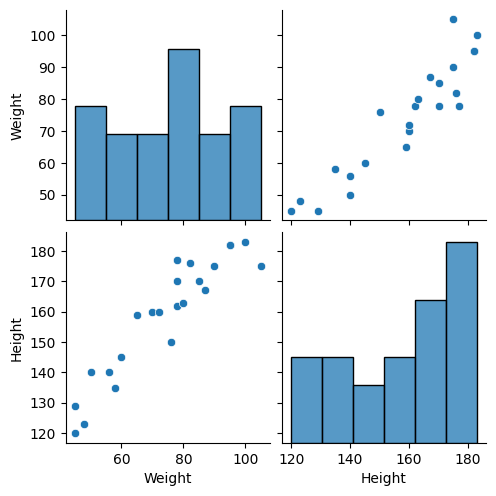

In [9]:
## Seaborn for visualization
import seaborn as sns
sns.pairplot(df)


In [14]:
## Independent and Dependent features
# X=df.iloc[:, :-1] 

X=df[['Weight']] # Independent feature (Dataframe)
Y=df['Height'] # Dependent feature (Series)


0     120
1     135
2     123
3     145
4     160
5     162
6     163
7     175
8     182
9     170
10    176
11    182
12    175
13    183
14    170
15    177
16    140
17    159
18    150
19    167
20    129
21    140
22    160
Name: Height, dtype: int64

In [15]:
## Train Test Split

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.25,random_state=42)


In [21]:
# Standardization
# We only apply standardization to independent features
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()

X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)


In [26]:
X_train

array([[-0.87662801],
       [ 1.66773133],
       [ 0.33497168],
       [-1.48242785],
       [ 1.36483141],
       [-1.6641678 ],
       [-0.75546804],
       [-0.1496682 ],
       [ 0.21381171],
       [-1.36126788],
       [-0.99778797],
       [-0.02850823],
       [ 1.06193149],
       [ 0.57729161],
       [ 0.75903157],
       [ 0.88019153],
       [ 0.45613165]])

In [27]:
X_test

array([[ 0.33497168],
       [ 0.33497168],
       [-1.6641678 ],
       [ 1.36483141],
       [-0.45256812],
       [ 1.97063125]])

## Applying Simple Linear Regression

In [29]:
from sklearn.linear_model import LinearRegression


In [31]:
regression=LinearRegression(n_jobs=-1)
regression.fit(X_train,y_train)


LinearRegression(n_jobs=-1)

In [34]:
# Slope
print("Slope: ",regression.coef_)

# Intercept
print("Intercept: ",regression.intercept_)

Slope:  [17.2982057]
Intercept:  156.47058823529412


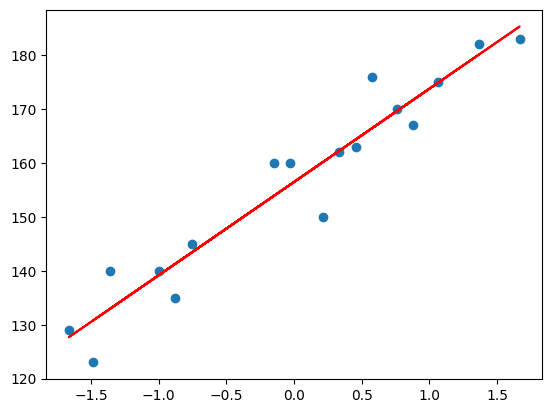

In [36]:
## Plotting the regression line or best fit line
plt.scatter(X_train,y_train)
plt.plot(X_train,regression.predict(X_train),color='red')


In [38]:
## Prediction for test data

y_pred=regression.predict(X_test)

y_pred


array([162.26499721, 162.26499721, 127.68347133, 180.07972266,
       148.64197186, 190.55897293])

In [39]:
# Performance Metrics

from sklearn.metrics import mean_squared_error,mean_absolute_error

In [40]:
mse=mean_squared_error(y_test,y_pred)
mae=mean_absolute_error(y_test,y_pred)
rmse=np.sqrt(mse)

print("MSE: ",mse)
print("MAE: ",mae)
print("RMSE: ",rmse)

MSE:  114.84069295228699
MAE:  9.66512588679501
RMSE:  10.716374991212605


### R square

Formula

#### R^2 = 1 - (SSR/SST)

In [41]:
from sklearn.metrics import r2_score

In [42]:
score=r2_score(y_test,y_pred)
print("R^2 Score: ",score)


R^2 Score:  0.7360826717981276


## Adjusted R^2

Formula
#### Adjusted R^2 = 1 - [(1-R^2)(n-1)/(n-k-1)]


In [46]:
# Calculate the adjusted R^2

n=len(y_test)
k=X_test.shape[1]

adjusted_r_squared=1-((1-score)*(n-1)/(n-k-1))
print("Adjusted R^2: ",adjusted_r_squared)


Adjusted R^2:  0.6701033397476595


In [47]:
## OLS Linear Regression

import statsmodels.api as sm


In [48]:
model=sm.OLS(y_train,X_train).fit()


In [50]:
prediction=model.predict(X_test)
prediction


array([  5.79440897,   5.79440897, -28.78711691,  23.60913442,
        -7.82861638,  34.08838469])

In [51]:
model.summary()


d:\Study\Coading New Start\ML journey\Assignments\assignment_solution\venv\Lib\site-packages\scipy\stats\_axis_nan_policy.py:430: UserWarning: `kurtosistest` p-value may be inaccurate with fewer than 20 observations; only n=17 observations were given.
  return hypotest_fun_in(*args, **kwds)


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                 Height   R-squared (uncentered):                   0.012
Model:                            OLS   Adj. R-squared (uncentered):             -0.050
Method:                 Least Squares   F-statistic:                             0.1953
Date:                Fri, 23 May 2025   Prob (F-statistic):                       0.664
Time:                        18:25:17   Log-Likelihood:                         -110.03
No. Observations:                  17   AIC:                                      222.1
Df Residuals:                      16   BIC:                                      222.9
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            17.2982     39.138      0.442      0.664     -65.671     100.267
==============================================================================
Omnibus:                        0.135   Durbin-Watson:                   0.002
Prob(Omnibus):                  0.935   Jarque-Bera (JB):                0.203
Skew:                          -0.166   Prob(JB):                        0.904
Kurtosis:                       2.581   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [54]:
## Prediction for new data

regression.predict(scaler.transform([[72]]))


d:\Study\Coading New Start\ML journey\Assignments\assignment_solution\venv\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([155.97744705])